In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm.auto import tqdm

In [ ]:
def read_every_nth_frame( video_capture, n):
	frame_count = 0
	frames = []
	while video_capture.isOpened():
		ret, frame = video_capture.read()

		if not ret:
			break

		if frame_count % n == 0:
			frames.append( cv2.cvtColor( frame, cv2.COLOR_BGR2RGB))

		frame_count += 1

	return np.array( frames)

In [ ]:
cap = cv2.VideoCapture( "image/MyRecord_20241116133821.mp4")

if cap.isOpened() == False:
	print( "Error Opening Video stream")

frames = read_every_nth_frame( cap, 1)

In [ ]:
frames.shape

In [ ]:
frame = frames[ 560]

In [2]:
frame = cv2.imread( "sample.png")

frame = cv2.cvtColor( frame, cv2.COLOR_BGR2RGB)

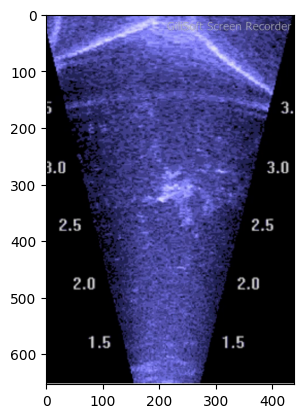

In [3]:
plt.imshow( frame)

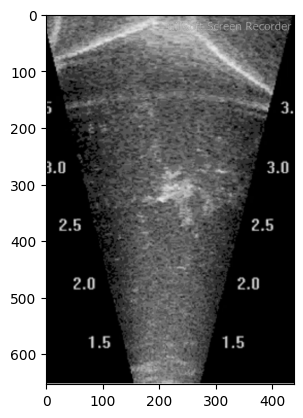

In [4]:
gray_frame = cv2.cvtColor( frame, cv2.COLOR_BGR2GRAY)

plt.imshow( gray_frame, cmap="gray")

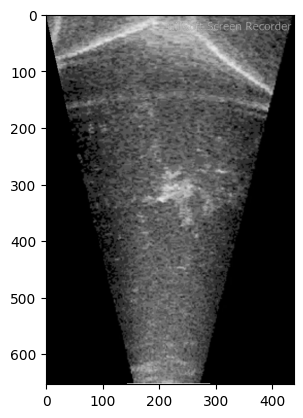

In [6]:
height, width = gray_frame.shape

mask = np.zeros_like( gray_frame)
# triangle = np.array( [ [ 0, height], [ width // 2, 0],  [ width, height]], np.int32)

polygon = np.array( [
	[ width * 0.33, height],	# Bottom-left
	[ width * 0.66, height],	# Botton-Right
	[ width, 0],				# Top-Right
	[ 0, 0],					# Top-Left
], np.int32)

mask = cv2.fillPoly( mask, [ polygon], 255)

masked_image = cv2.bitwise_and( gray_frame, mask)

plt.imshow( masked_image, cmap="gray")

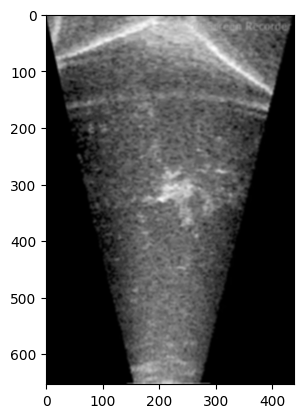

In [7]:
blurred_frame = cv2.GaussianBlur( masked_image, ( 5, 5), sigmaX=2, sigmaY=2)

plt.imshow( blurred_frame, cmap="gray")

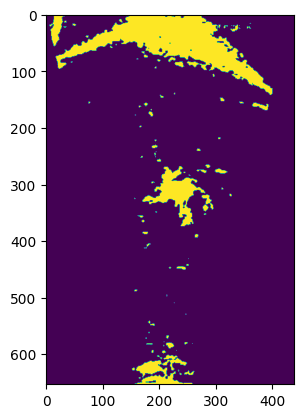

In [8]:
c = 0.5

_, binary_frame = cv2.threshold( blurred_frame, c * 255, 255, cv2.THRESH_BINARY)

bright_pixels = np.column_stack( np.where( binary_frame > 0))

plt.imshow( binary_frame)

In [9]:
kmeans = KMeans( n_clusters=70, n_init="auto").fit( bright_pixels)

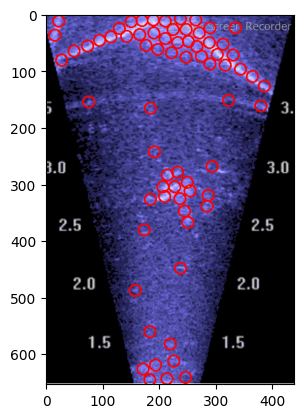

In [10]:
cluster_centers = kmeans.cluster_centers_.astype( int)
output_image = frame.copy()

for c in cluster_centers:
	cv2.circle( output_image, ( c[ 1], c[ 0]), 10, ( 255, 0, 0), 2)

plt.imshow( output_image)

In [ ]:
def generate( frames):
	output = []

	for f in tqdm( frames):
		output_image = f.copy()

		gray_frame = cv2.cvtColor( f, cv2.COLOR_BGR2GRAY)

		height, width = gray_frame.shape

		mask = np.zeros_like( gray_frame)

		polygon = np.array( [
			[ width * 0.33, height],	# Bottom-left
			[ width * 0.66, height],	# Botton-Right
			[ width, 0],				# Top-Right
			[ 0, 0],					# Top-Left
		], np.int32)

		mask = cv2.fillPoly( mask, [ polygon], 255)

		masked_image = cv2.bitwise_and( gray_frame, mask)

		blurred_frame = cv2.GaussianBlur( masked_image, ( 5, 5), sigmaX=2, sigmaY=2)

		_, binary_frame = cv2.threshold( blurred_frame, 175, 255, cv2.THRESH_BINARY)

		bright_pixels = np.column_stack( np.where( binary_frame > 0))

		k = 10
		
		if len( bright_pixels) < 1:
			output.append( output_image)
			continue

		kmeans = KMeans( n_clusters=k, n_init="auto").fit( bright_pixels)

		cluster_centers = kmeans.cluster_centers_.astype( int)

		for c in cluster_centers:
			cv2.circle( output_image, ( c[ 1], c[ 0]), 10, ( 255, 0, 0), 2)

		output.append( output_image)

	return output

In [ ]:
o = generate( frames)

In [ ]:
height, width, _ = o[ 0].shape

fourcc = cv2.VideoWriter_fourcc( *"MP4V")
video = cv2.VideoWriter( "video2.mp4", fourcc, 25, ( width, height))

for f in o:
	video.write( cv2.cvtColor( f, cv2.COLOR_RGB2BGR))

video.release()